In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns

## DATAFRAME CREATION

In [2]:
shots=pd.read_csv('..\data\produced_datasets\season_18_19_shots.csv',index_col=[0])
shots['location']=[literal_eval(value) for value in shots['location']]
shots['shot.end_location']=[literal_eval(value) for value in shots['shot.end_location']]
luis=shots[(shots['player.id']==5246.0) & (shots['shot.type.id']==87.0)]
x=np.arange(40,121,8)
y=np.arange(0,81,8)
res_x = list(map(list, zip(x, x[1:])))
res_y = list(map(list, zip(y, y[1:])))
dic_y={res_y.index(element):element for element in res_y}
dic_x={res_x.index(element):element for element in res_x}
luis['zone_x']=[key for value in luis['location'] for key,result in dic_x.items() if (value[0]>=result[0]) & (value[0]<result[1])]
luis['zone_y']=[key for value in luis['location'] for key,result in dic_y.items() if (value[1]>=result[0]) & (value[1]<result[1])]
luis['zone'] = list(zip(luis.zone_x, luis.zone_y))
luis['to_goal']=[len(value)==3 for value in luis['shot.end_location']]
luis_made=luis[luis['to_goal']==True]
luis_made['on_goal_loc']=[[element[1],element[2]] if (element[1]>=36.0) & (element[1]<=44.0) & (element[2]<=2.67) & (element[2]>0) else 0 for element in luis_made['shot.end_location']]
luis_shots_on_goal=luis_made[luis_made['on_goal_loc']!=0]
luis_shots_on_goal['goal_x']=[element[0] for element in luis_shots_on_goal['on_goal_loc']]
luis_shots_on_goal['goal_y']=[element[1] for element in luis_shots_on_goal['on_goal_loc']]

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [3]:
luis_shots_on_goal

,index,minute,second,player.id,player.name,location,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,...,shot.outcome.name,shot.end_location,under_pressure,zone_x,zone_y,zone,to_goal,on_goal_loc,goal_x,goal_y
2,1799,39,16,5246.0,Luis Alberto Suárez Díaz,"[106.0, 46.0]",87.0,Open Play,38.0,Left Foot,...,Saved,"[117.8, 42.0, 0.2]",False,8,5,"(8, 5)",True,"[42.0, 0.2]",42.0,0.2
9,2816,62,14,5246.0,Luis Alberto Suárez Díaz,"[109.8, 38.8]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 36.8, 0.2]",False,8,4,"(8, 4)",True,"[36.8, 0.2]",36.8,0.2
10,3297,73,5,5246.0,Luis Alberto Suárez Díaz,"[107.4, 49.4]",87.0,Open Play,40.0,Right Foot,...,Saved,"[116.6, 42.1, 0.2]",False,8,6,"(8, 6)",True,"[42.1, 0.2]",42.1,0.2
19,1617,38,26,5246.0,Luis Alberto Suárez Díaz,"[99.9, 38.9]",87.0,Open Play,38.0,Left Foot,...,Saved,"[116.1, 42.1, 0.7]",True,7,4,"(7, 4)",True,"[42.1, 0.7]",42.1,0.7
35,3547,81,7,5246.0,Luis Alberto Suárez Díaz,"[113.6, 42.9]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 40.8, 0.2]",False,9,5,"(9, 5)",True,"[40.8, 0.2]",40.8,0.2
37,955,18,21,5246.0,Luis Alberto Suárez Díaz,"[107.6, 30.6]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 43.5, 0.4]",False,8,3,"(8, 3)",True,"[43.5, 0.4]",43.5,0.4
40,2508,55,16,5246.0,Luis Alberto Suárez Díaz,"[112.1, 40.2]",87.0,Open Play,37.0,Head,...,Saved,"[119.1, 39.4, 0.9]",False,9,5,"(9, 5)",True,"[39.4, 0.9]",39.4,0.9
43,2636,58,23,5246.0,Luis Alberto Suárez Díaz,"[115.1, 53.1]",87.0,Open Play,40.0,Right Foot,...,Goal,"[120.0, 40.3, 0.2]",False,9,6,"(9, 6)",True,"[40.3, 0.2]",40.3,0.2
58,3854,92,26,5246.0,Luis Alberto Suárez Díaz,"[108.1, 33.1]",87.0,Open Play,40.0,Right Foot,...,Saved,"[118.3, 38.8, 1.3]",False,8,4,"(8, 4)",True,"[38.8, 1.3]",38.8,1.3
62,2000,41,1,5246.0,Luis Alberto Suárez Díaz,"[107.8, 27.8]",87.0,Open Play,40.0,Right Foot,...,Saved,"[118.2, 36.0, 0.2]",False,8,3,"(8, 3)",True,"[36.0, 0.2]",36.0,0.2


## SHOT VISUALIZATION

In [5]:
x_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']=='Goal']['goal_x']
y_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']=='Goal']['goal_y']
x_no_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']!='Goal']['goal_x']
y_no_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']!='Goal']['goal_y']

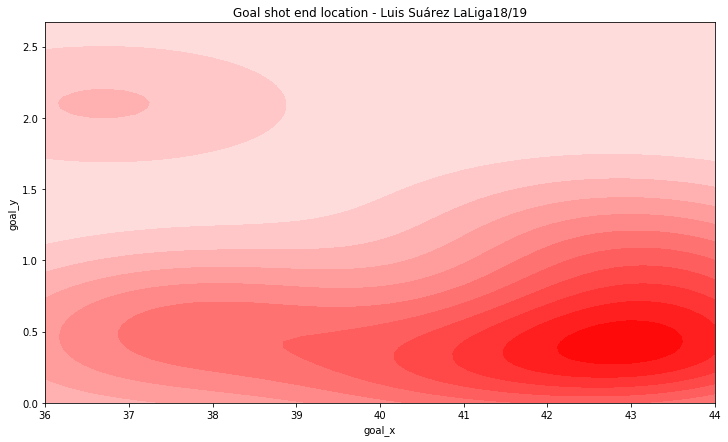

In [6]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 7)
sns.kdeplot(x_goal, y_goal, shade=True, color='red')
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.title('Goal shot end location - Luis Suárez LaLiga18/19')
plt.show()

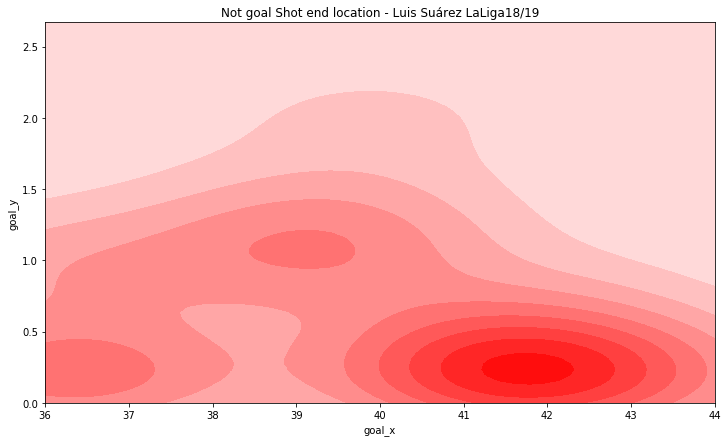

In [7]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 7)
sns.kdeplot(x_no_goal, y_no_goal, shade=True, color='red')
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.title('Not goal Shot end location - Luis Suárez LaLiga18/19')
plt.show()

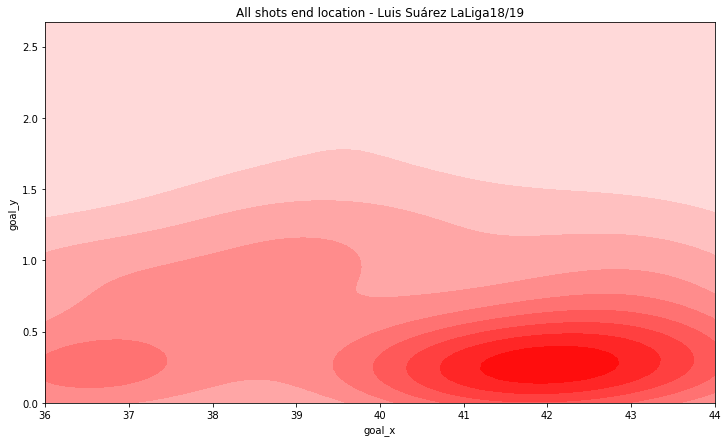

In [8]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 7)
sns.kdeplot(luis_shots_on_goal['goal_x'], luis_shots_on_goal['goal_y'], shade=True, color='red')
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.title('All shots end location - Luis Suárez LaLiga18/19')
plt.show()